PRIMER PARCIAL

Nombre: Rosa Leonor Blanco Moya

Carrera: Ingenieria de Sistemas

In [30]:
# utilizado para la manipulación de directorios y rutas
import os
import numpy as np# Cálculo científico y vectorial para python
from matplotlib import pyplot #graficos
import pandas as pd
from scipy import optimize # Modulo de optimizacion en scipy
%matplotlib inline



In [31]:
#Importamos el dataset
data = pd.read_csv('./diamonds.csv', delimiter=',')

In [32]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [33]:
# Agregar una columna de texto aleatorio

conditions = [
    (data['price'] <= 500),         # super economico
    (data['price'] > 500) & (data['price'] < 1500),  # economico
    (data['price'] >= 1500) & (data['price'] < 2500),  # precio normal
    (data['price'] >= 2500) & (data['price'] < 3500),  # costoso
    (data['price'] >= 3500)         # muy costoso
]

# Definir los valores correspondientes a cada condición
choices = ['super economico', 'economico', 'precio normal', 'costoso', 'muy costoso']

# Crear la nueva columna 'economico' basada en las condiciones
data['economico'] = np.select(conditions, choices)
data # Mostrar los primeros datos con la nueva columna

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,economico
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,super economico
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,super economico
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,super economico
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,super economico
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,super economico
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,costoso
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,costoso
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,costoso
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,costoso


In [34]:
# Agregar una columna de texto aleatorio

conditions = [
    (data['cut'] == 'Ideal'),         
    (data['cut'] == 'Premium'),  
    (data['cut'] == 'Good'),  
    (data['cut'] == 'Very Good'),  
    (data['cut'] == 'Fair')         
]

# Definir los valores correspondientes a cada condición
choices = ['i', 'p', 'g', 'v', 'f']

# Crear la nueva columna 'calidad_del_corte' basada en las condiciones
data['calidad_del_corte'] = np.select(conditions, choices)
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,economico,calidad_del_corte
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,super economico,i
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,super economico,p
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,super economico,g
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,super economico,p
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,super economico,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,costoso,i
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,costoso,g
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,costoso,v
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,costoso,p


In [35]:
#anadir columna de valores booleanos

data['pesado'] = np.where(data['carat'] > 0.5, True, False)
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,economico,calidad_del_corte,pesado
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,super economico,i,False
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,super economico,p,False
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,super economico,g,False
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,super economico,p,False
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,super economico,g,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,costoso,i,True
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,costoso,g,True
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,costoso,v,True
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,costoso,p,True


In [36]:
# Definir el mapeo de las clases a números
mapeo = {'super economico':1, 'economico':2, 'precio normal':3, 'costoso':4, 'muy costoso':5}

# Reemplazar las clases por números en la columna 'economico'
data['economico'] = data['economico'].replace(mapeo)

data

C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\117739981.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['economico'] = data['economico'].replace(mapeo)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,economico,calidad_del_corte,pesado
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,i,False
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,p,False
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,g,False
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1,p,False
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,g,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,4,i,True
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,4,g,True
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,4,v,True
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,4,p,True


In [54]:
# Definir el mapeo de las clases a números
mapeo = {'i':1, 'p':2, 'g':3, 'v':4, 'f':5}

# Reemplazar las clases por números en la columna 'economico'
data['calidad_del_corte'] = data['calidad_del_corte'].replace(mapeo)

# Definir el mapeo de las clases a números
mapeo = {True:1, False:2 }

# Reemplazar las clases por números en la columna 'economico'
data['pesado'] = data['pesado'].replace(mapeo)

data

C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\1792986373.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['calidad_del_corte'] = data['calidad_del_corte'].replace(mapeo)
C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\1792986373.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['pesado'] = data['pesado'].replace(mapeo)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,economico,calidad_del_corte,pesado
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,1,2
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,2,2
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,3,2
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1,2,2
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,4,1,1
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,4,3,1
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,4,4,1
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,4,2,1


In [56]:
import pandas as pd

# Supongamos que tu DataFrame se llama df
class_counts = data['clarity'].value_counts()

print(class_counts)

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


In [57]:
# Definir el mapeo de las clases a números
mapeo = {'G':1,'E':2 , 'F':3,'H':4,'D':5,'I':6,'J':7 }

# Reemplazar las clases por números en la columna 'economico'
data['color'] = data['color'].replace(mapeo)

# Definir el mapeo de las clases a números
mapeo = {'SI1':1 ,'VS2':2 ,'SI2':3  ,'VS1':4 ,'VVS2':5 ,'VVS1':6 ,'IF':7 ,'I1':8}

# Reemplazar las clases por números en la columna 'economico'
data['clarity'] = data['clarity'].replace(mapeo)

data

C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\425866470.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['color'] = data['color'].replace(mapeo)
C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\425866470.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['clarity'] = data['clarity'].replace(mapeo)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,economico,calidad_del_corte,pesado
0,1,0.23,Ideal,2,3,61.5,55.0,326,3.95,3.98,2.43,1,1,2
1,2,0.21,Premium,2,1,59.8,61.0,326,3.89,3.84,2.31,1,2,2
2,3,0.23,Good,2,4,56.9,65.0,327,4.05,4.07,2.31,1,3,2
3,4,0.29,Premium,6,2,62.4,58.0,334,4.20,4.23,2.63,1,2,2
4,5,0.31,Good,7,3,63.3,58.0,335,4.34,4.35,2.75,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,5,1,60.8,57.0,2757,5.75,5.76,3.50,4,1,1
53936,53937,0.72,Good,5,1,63.1,55.0,2757,5.69,5.75,3.61,4,3,1
53937,53938,0.70,Very Good,5,1,62.8,60.0,2757,5.66,5.68,3.56,4,4,1
53938,53939,0.86,Premium,4,3,61.0,58.0,2757,6.15,6.12,3.74,4,2,1


In [62]:
# Calcular la media de cada columna
#medias = data.mean()
import numpy as np
#Good          4906
#Fair          1610

# Definir la cantidad de datos a generar
datos_a_aumentar = 8000
datos_a_aumentar1 = 11000

# Filtrar las clases con menos datos
df_good = data[data['cut'] == 'Good']
df_very = data[data['cut'] == 'Fair']

# Obtener las medias y desviaciones estándar de cada columna (excepto la columna de etiquetas)
medias = data.drop(columns=['cut']).mean()
desviaciones = data.drop(columns=['cut']).std()

# Generar datos sintéticos
datos_sinteticos_good = pd.DataFrame(np.random.normal(loc=medias, scale=desviaciones, size=(datos_a_aumentar, len(medias))), columns=medias.index)
datos_sinteticos_good['cut'] = 'Good'

datos_sinteticos_very = pd.DataFrame(np.random.normal(loc=medias, scale=desviaciones, size=(datos_a_aumentar1, len(medias))), columns=medias.index)
datos_sinteticos_very['cut'] = 'Fair'

# Concatenar los datos sintéticos al dataframe original
df_aumentado = pd.concat([data, datos_sinteticos_good, datos_sinteticos_very], ignore_index=True)



In [63]:
df_aumentado

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,economico,calidad_del_corte,pesado
0,1.000000,0.230000,Ideal,2.000000,3.000000,61.500000,55.000000,326.000000,3.950000,3.980000,2.430000,1.000000,1.000000,2.000000
1,2.000000,0.210000,Premium,2.000000,1.000000,59.800000,61.000000,326.000000,3.890000,3.840000,2.310000,1.000000,2.000000,2.000000
2,3.000000,0.230000,Good,2.000000,4.000000,56.900000,65.000000,327.000000,4.050000,4.070000,2.310000,1.000000,3.000000,2.000000
3,4.000000,0.290000,Premium,6.000000,2.000000,62.400000,58.000000,334.000000,4.200000,4.230000,2.630000,1.000000,2.000000,2.000000
4,5.000000,0.310000,Good,7.000000,3.000000,63.300000,58.000000,335.000000,4.340000,4.350000,2.750000,1.000000,3.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72935,39668.844872,1.129104,Fair,0.905161,0.982545,60.807541,52.270126,10323.105897,5.706735,4.989780,2.439776,3.045355,0.803579,0.828738
72936,22186.656559,0.333372,Fair,5.454660,0.081645,59.874724,54.881670,8127.941184,7.915960,6.638142,3.524864,1.412722,-0.750946,1.783066
72937,26676.623245,0.788041,Fair,2.806408,3.955888,59.759494,56.280913,8453.643163,4.646239,4.678270,2.585384,4.706927,1.429559,1.520429
72938,12579.199526,1.063294,Fair,0.516916,-0.321053,62.142231,57.666589,5557.924310,5.592766,5.389795,3.686755,4.748246,1.525537,0.915349


In [66]:
import pandas as pd

# Supongamos que tu DataFrame se llama df
class_counts = df_aumentado['cut'].value_counts()

print(class_counts)

cut
Ideal        21551
Premium      13791
Good         12906
Fair         12610
Very Good    12082
Name: count, dtype: int64


In [67]:
# Definir el mapeo de las clases a números
mapeo = {'Ideal':1, 'Good':2, 'Very Good':3, 'Fair':4, 'Premium':5}

# Reemplazar las clases por números en la columna 'economico'
df_aumentado['cut'] = df_aumentado['cut'].replace(mapeo)

df_aumentado

C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\3754920303.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_aumentado['cut'] = df_aumentado['cut'].replace(mapeo)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,economico,calidad_del_corte,pesado
0,1.000000,0.230000,1,2.000000,3.000000,61.500000,55.000000,326.000000,3.950000,3.980000,2.430000,1.000000,1.000000,2.000000
1,2.000000,0.210000,5,2.000000,1.000000,59.800000,61.000000,326.000000,3.890000,3.840000,2.310000,1.000000,2.000000,2.000000
2,3.000000,0.230000,2,2.000000,4.000000,56.900000,65.000000,327.000000,4.050000,4.070000,2.310000,1.000000,3.000000,2.000000
3,4.000000,0.290000,5,6.000000,2.000000,62.400000,58.000000,334.000000,4.200000,4.230000,2.630000,1.000000,2.000000,2.000000
4,5.000000,0.310000,2,7.000000,3.000000,63.300000,58.000000,335.000000,4.340000,4.350000,2.750000,1.000000,3.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72935,39668.844872,1.129104,4,0.905161,0.982545,60.807541,52.270126,10323.105897,5.706735,4.989780,2.439776,3.045355,0.803579,0.828738
72936,22186.656559,0.333372,4,5.454660,0.081645,59.874724,54.881670,8127.941184,7.915960,6.638142,3.524864,1.412722,-0.750946,1.783066
72937,26676.623245,0.788041,4,2.806408,3.955888,59.759494,56.280913,8453.643163,4.646239,4.678270,2.585384,4.706927,1.429559,1.520429
72938,12579.199526,1.063294,4,0.516916,-0.321053,62.142231,57.666589,5557.924310,5.592766,5.389795,3.686755,4.748246,1.525537,0.915349


In [68]:
# Guardar el dataset procesado
df_aumentado.to_csv('C:\SIS420\Blanco-Moya-Rosa-Leonor-SIS420-AI\parciales\primer parcial\diamonds_proced.csv', index=False)


<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\4162268916.py:2: SyntaxWarning: invalid escape sequence '\S'
  df_aumentado.to_csv('C:\SIS420\Blanco-Moya-Rosa-Leonor-SIS420-AI\parciales\primer parcial\diamonds_proced.csv', index=False)


In [74]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Definir las características (X) y la variable objetivo (y)
X = df_aumentado.drop(columns=['cut'])  # El resto de las columnas
y = df_aumentado['cut']  # La columna con las clases

# Dividir el dataset en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# Asegurarse de que los índices coincidan al concatenar
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Crear los DataFrames para entrenamiento y prueba
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)


In [75]:
df_test

,Unnamed: 0,carat,color,clarity,depth,table,price,x,y,z,economico,calidad_del_corte,pesado,cut
0,32719.000000,0.31000,3.000000,2.000000,62.4000,56.000000,802.000000,4.340000,4.310000,2.70000,2.000000,1.000000,2.000000,1
1,41827.000000,0.31000,5.000000,7.000000,61.1000,56.000000,1251.000000,4.390000,4.420000,2.69000,2.000000,1.000000,2.000000,1
2,26648.000000,2.05000,4.000000,3.000000,62.5000,58.000000,16431.000000,8.120000,8.080000,5.06000,5.000000,2.000000,1.000000,5
3,8519.000000,1.00000,2.000000,3.000000,62.6000,58.000000,4426.000000,6.330000,6.390000,3.98000,5.000000,4.000000,1.000000,3
4,5657.000000,0.90000,3.000000,1.000000,63.2000,61.000000,3881.000000,6.130000,6.090000,3.86000,5.000000,4.000000,1.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14583,47029.000000,0.54000,3.000000,4.000000,62.5000,56.000000,1819.000000,5.180000,5.220000,3.25000,3.000000,1.000000,1.000000,1
14584,18868.000000,1.02000,2.000000,4.000000,60.5000,60.000000,7738.000000,6.490000,6.540000,3.94000,5.000000,4.000000,1.000000,3
14585,45667.000000,0.53000,5.000000,2.000000,61.8000,57.000000,1694.000000,5.170000,5.210000,3.21000,3.000000,1.000000,1.000000,1
14586,52766.469123,0.73228,4.882441,3.950638,61.2944,59.906812,6622.197564,6.956729,6.194333,2.88793,2.414565,1.942303,1.096837,2


In [79]:
# Asegurarse de que los índices coincidan y asignar el nombre a la columna
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Asignar nombre a la columna después de resetear el índice
y_train.name = 'cut'
y_test.name = 'cut'

# Crear los DataFrames para entrenamiento y prueba
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)


In [80]:
df_test

,Unnamed: 0,carat,color,clarity,depth,table,price,x,y,z,economico,calidad_del_corte,pesado,cut
0,32719.000000,0.31000,3.000000,2.000000,62.4000,56.000000,802.000000,4.340000,4.310000,2.70000,2.000000,1.000000,2.000000,1
1,41827.000000,0.31000,5.000000,7.000000,61.1000,56.000000,1251.000000,4.390000,4.420000,2.69000,2.000000,1.000000,2.000000,1
2,26648.000000,2.05000,4.000000,3.000000,62.5000,58.000000,16431.000000,8.120000,8.080000,5.06000,5.000000,2.000000,1.000000,5
3,8519.000000,1.00000,2.000000,3.000000,62.6000,58.000000,4426.000000,6.330000,6.390000,3.98000,5.000000,4.000000,1.000000,3
4,5657.000000,0.90000,3.000000,1.000000,63.2000,61.000000,3881.000000,6.130000,6.090000,3.86000,5.000000,4.000000,1.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14583,47029.000000,0.54000,3.000000,4.000000,62.5000,56.000000,1819.000000,5.180000,5.220000,3.25000,3.000000,1.000000,1.000000,1
14584,18868.000000,1.02000,2.000000,4.000000,60.5000,60.000000,7738.000000,6.490000,6.540000,3.94000,5.000000,4.000000,1.000000,3
14585,45667.000000,0.53000,5.000000,2.000000,61.8000,57.000000,1694.000000,5.170000,5.210000,3.21000,3.000000,1.000000,1.000000,1
14586,52766.469123,0.73228,4.882441,3.950638,61.2944,59.906812,6622.197564,6.956729,6.194333,2.88793,2.414565,1.942303,1.096837,2


In [81]:
import pandas as pd

# Supongamos que tu DataFrame se llama df
class_counts = df_test['cut'].value_counts()

print(class_counts)

cut
1    4310
5    2758
2    2581
4    2522
3    2417
Name: count, dtype: int64


In [87]:
X_test = df_test.drop(columns=['cut']).values  # El resto de las columnas
y_test = df_test['cut'].values  # La columna con las clases

X_train = df_train.drop(columns=['cut']).values  # El resto de las columnas
y_train = df_train['cut'].values 

In [90]:
# Guardar los conjuntos de entrenamiento y prueba en archivos CSV
df_train.to_csv('C:\SIS420\Blanco-Moya-Rosa-Leonor-SIS420-AI\parciales\primer parcial\diamonds_train.csv', index=False)
df_test.to_csv('C:\SIS420\Blanco-Moya-Rosa-Leonor-SIS420-AI\parciales\primer parcial\diamonds_test.csv', index=False)


<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\1975716185.py:2: SyntaxWarning: invalid escape sequence '\S'
  df_train.to_csv('C:\SIS420\Blanco-Moya-Rosa-Leonor-SIS420-AI\parciales\primer parcial\diamonds_train.csv', index=False)
C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\1975716185.py:3: SyntaxWarning: invalid escape sequence '\S'
  df_test.to_csv('C:\SIS420\Blanco-Moya-Rosa-Leonor-SIS420-AI\parciales\primer parcial\diamonds_test.csv', index=False)


In [38]:
# Duplicar el dataset
df_duplicate = data.copy()

# Aplicar variaciones a las primeras 7 columnas
numeric_columns= df_duplicate.iloc[:, 0:7].select_dtypes(include=['float64', 'int64']).columns
df_duplicate[numeric_columns] += np.random.uniform(-0.5, 0.5, size=(len(df_duplicate), len(numeric_columns)))

# Introducir pequeñas variaciones a las columnas numéricas del dataset duplicado
for column in df_duplicate.columns:
    if df_duplicate[column].dtype in ['float64', 'int64']:  # Solo para columnas numéricas
        variation = np.random.normal(-0.5, 0.5, size=len(df_duplicate))
        df_duplicate[column] = df_duplicate[column] + variation

# Concatenar el dataset original con el duplicado
df_final = pd.concat([data, df_duplicate], ignore_index=True)

# Mostrar el dataset final
#print(df_final)
df_final

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,economico,calidad_del_corte,pesado
0,1.000000,0.230000,Ideal,E,SI2,61.500000,55.000000,326.000000,3.950000,3.980000,2.430000,1.000000,i,False
1,2.000000,0.210000,Premium,E,SI1,59.800000,61.000000,326.000000,3.890000,3.840000,2.310000,1.000000,p,False
2,3.000000,0.230000,Good,E,VS1,56.900000,65.000000,327.000000,4.050000,4.070000,2.310000,1.000000,g,False
3,4.000000,0.290000,Premium,I,VS2,62.400000,58.000000,334.000000,4.200000,4.230000,2.630000,1.000000,p,False
4,5.000000,0.310000,Good,J,SI2,63.300000,58.000000,335.000000,4.340000,4.350000,2.750000,1.000000,g,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107875,53934.872665,0.575667,Ideal,D,SI1,59.128929,56.215062,2757.285482,5.184425,5.679830,2.648427,4.280399,i,True
107876,53936.835509,-0.137120,Good,D,SI1,62.455253,53.767282,2756.102631,4.405142,4.868657,3.093839,3.684233,g,True
107877,53936.992789,1.629268,Very Good,D,SI1,63.129407,59.724337,2756.204615,4.118719,5.666791,2.743955,3.252136,v,True
107878,53937.871710,0.080899,Premium,H,SI2,59.981681,58.242678,2757.079539,5.183060,6.133145,4.150070,3.756028,p,True


In [39]:
import pandas as pd

# Supongamos que tu DataFrame se llama df
class_counts = df_final['cut'].value_counts()

print(class_counts)


cut
Ideal        43102
Premium      27582
Very Good    24164
Good          9812
Fair          3220
Name: count, dtype: int64


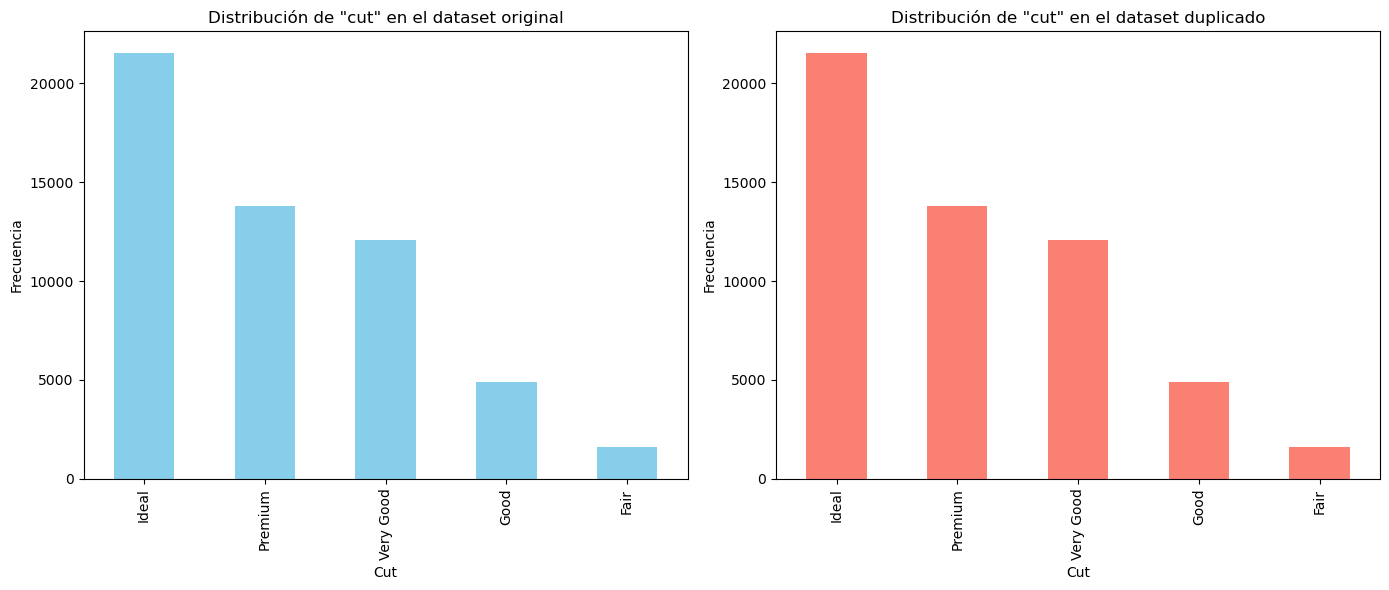

In [40]:

# Graficar el dataset original pyplot
pyplot.figure(figsize=(14, 6))

pyplot.subplot(1, 2, 1)
data['cut'].value_counts().plot(kind='bar', color='skyblue')
pyplot.title('Distribución de "cut" en el dataset original')
pyplot.xlabel('Cut')
pyplot.ylabel('Frecuencia')

# Graficar el dataset duplicado (sintético)
pyplot.subplot(1, 2, 2)
df_duplicate['cut'].value_counts().plot(kind='bar', color='salmon')
pyplot.title('Distribución de "cut" en el dataset duplicado')
pyplot.xlabel('Cut')
pyplot.ylabel('Frecuencia')

pyplot.tight_layout()
pyplot.show()


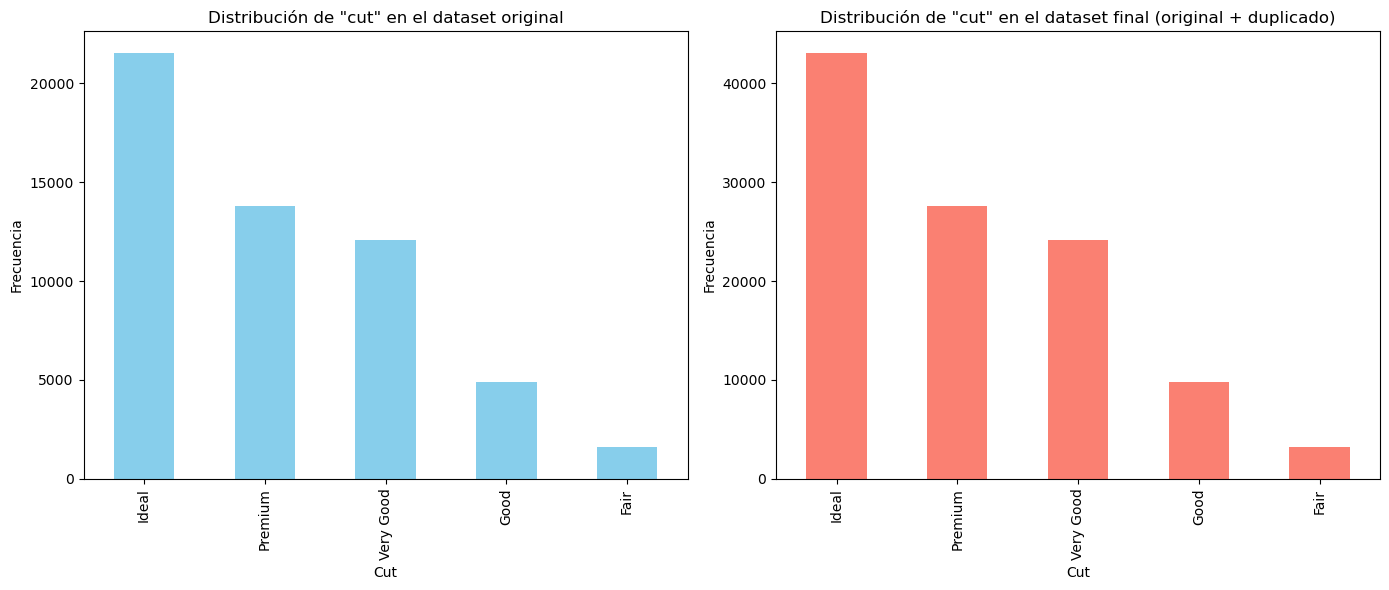

In [41]:
# Graficar el dataset original
pyplot.figure(figsize=(14, 6))

# Subplot 1: Distribución de "cut" en el dataset original
pyplot.subplot(1, 2, 1)
data['cut'].value_counts().plot(kind='bar', color='skyblue')
pyplot.title('Distribución de "cut" en el dataset original')
pyplot.xlabel('Cut')
pyplot.ylabel('Frecuencia')

# Subplot 2: Distribución de "cut" en el dataset final (original + sintético)
pyplot.subplot(1, 2, 2)
df_final['cut'].value_counts().plot(kind='bar', color='salmon')
pyplot.title('Distribución de "cut" en el dataset final (original + duplicado)')
pyplot.xlabel('Cut')
pyplot.ylabel('Frecuencia')

# Ajustar el layout para evitar solapamiento
pyplot.tight_layout()
pyplot.show()


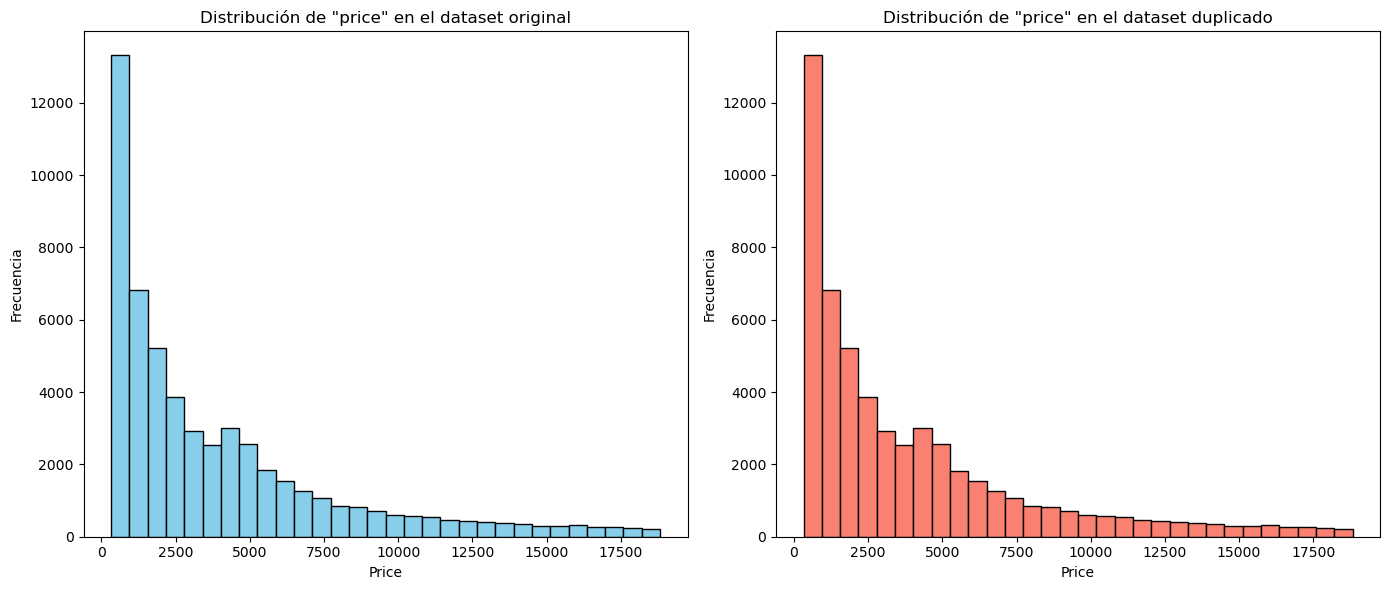

In [42]:
import matplotlib.pyplot as plt

# Graficar el dataset original
plt.figure(figsize=(14, 6))

# Subplot 1: Distribución de "price" en el dataset original
plt.subplot(1, 2, 1)
plt.hist(data['price'], bins=30, color='skyblue', edgecolor='black')  # Usar histograma para agrupar precios
plt.title('Distribución de "price" en el dataset original')
plt.xlabel('Price')
plt.ylabel('Frecuencia')

# Subplot 2: Distribución de "price" en el dataset duplicado
plt.subplot(1, 2, 2)
plt.hist(df_duplicate['price'], bins=30, color='salmon', edgecolor='black')  # Histograma también para el duplicado
plt.title('Distribución de "price" en el dataset duplicado')
plt.xlabel('Price')
plt.ylabel('Frecuencia')

# Ajustar el layout para evitar solapamiento
plt.tight_layout()
plt.show()


Número de Filas y Columnas (rows y 3 columnas): En lugar de una fila con muchas columnas, establezco que se dividan en un formato de múltiples filas (el número de filas es calculado dinámicamente para asegurarse de que haya espacio suficiente).

rows = (total_columns + 2) // 3: Calcula cuántas filas son necesarias si queremos tener 3 columnas en cada fila.
Distribuir Gráficas en Subplots: Esto asegura que las gráficas no se solapen, y que podamos mostrar más de 10 gráficos sin exceder el límite de matplotlib.

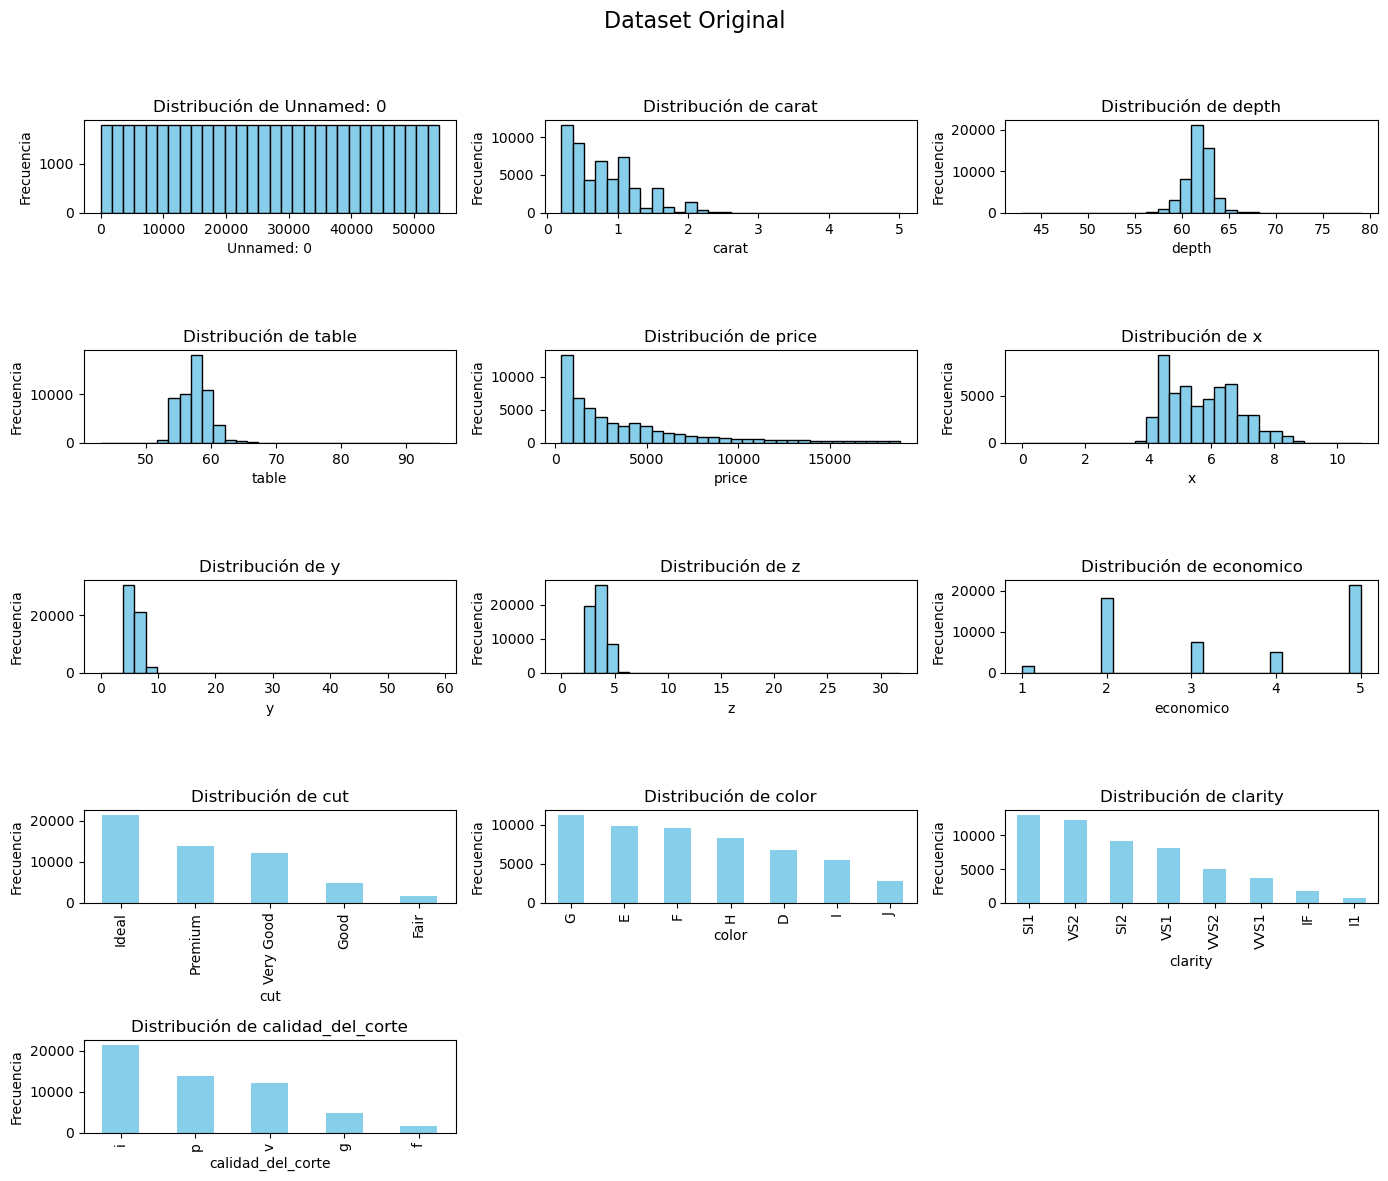

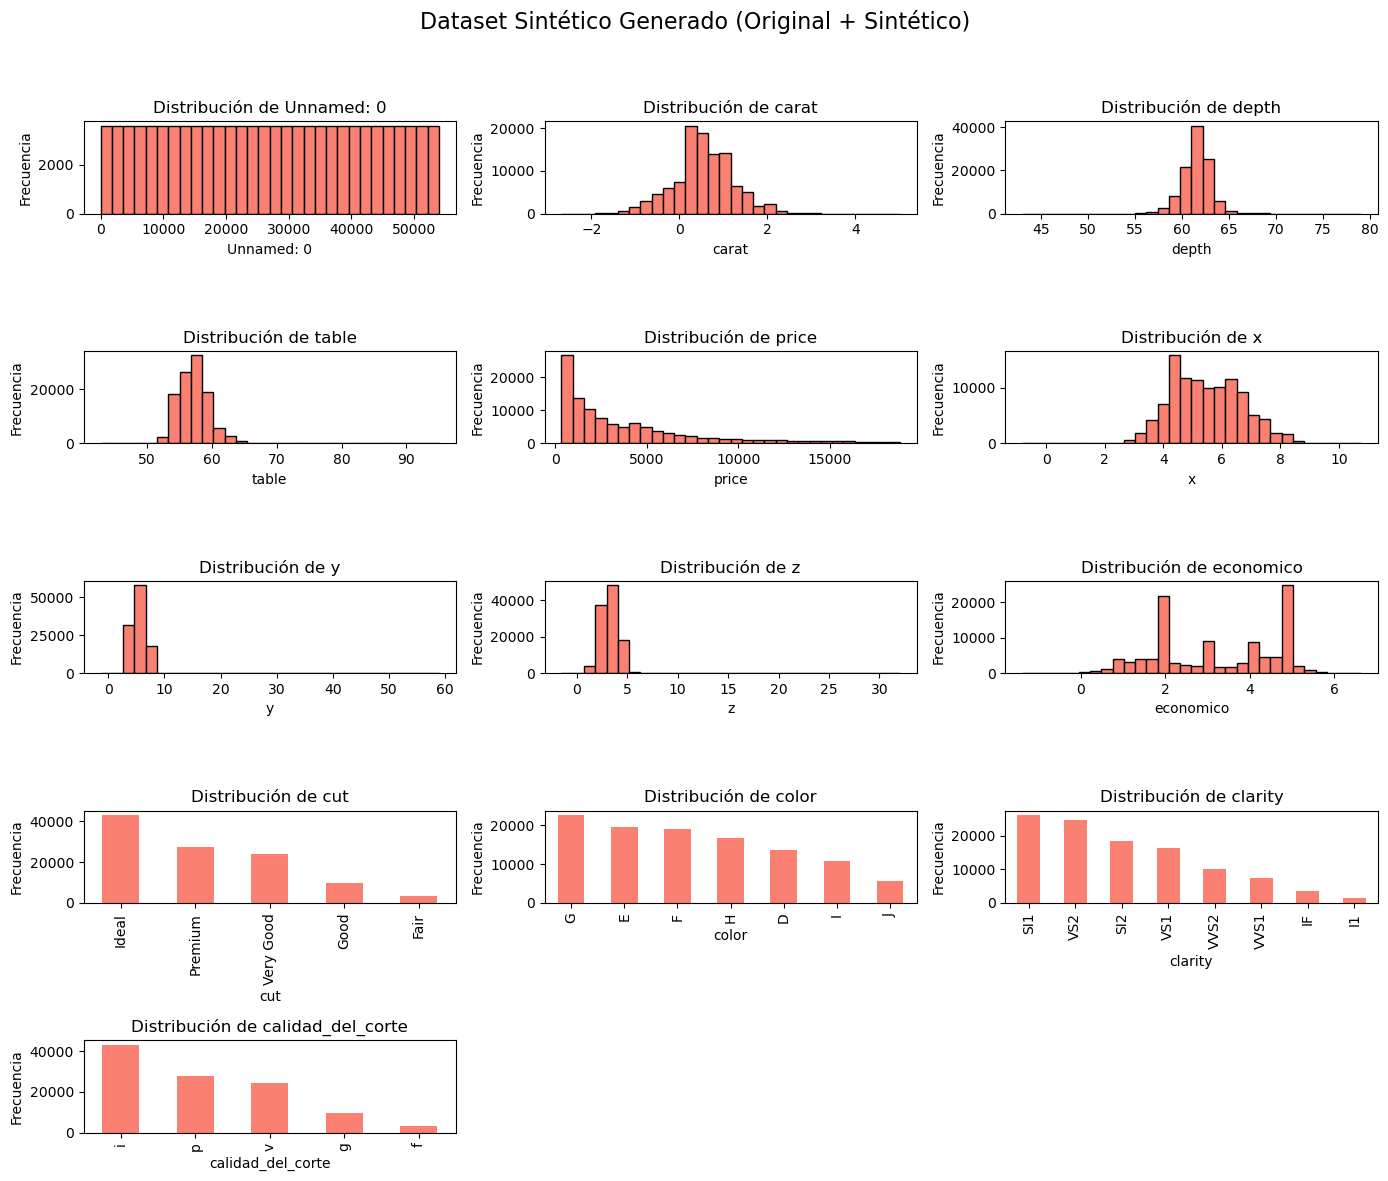

In [43]:
# Obtener las columnas numéricas y categóricas
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Cantidad total de columnas (numéricas + categóricas)
total_columns = len(numerical_cols) + len(categorical_cols)

# Graficar el dataset original
pyplot.figure(figsize=(14, 12))
pyplot.suptitle('Dataset Original', fontsize=16)

# Configurar el número de filas y columnas para los subplots
rows = (total_columns + 2) // 3  # Asegurarnos de que haya suficientes filas para todas las gráficas

# Gráficos para columnas numéricas del dataset original
for i, col in enumerate(numerical_cols, 1):
    pyplot.subplot(rows, 3, i)
    pyplot.hist(data[col], bins=30, color='skyblue', edgecolor='black')
    pyplot.title(f'Distribución de {col}')
    pyplot.xlabel(col)
    pyplot.ylabel('Frecuencia')

# Gráficos para columnas categóricas del dataset original
for i, col in enumerate(categorical_cols, 1):
    pyplot.subplot(rows, 3, i + len(numerical_cols))
    data[col].value_counts().plot(kind='bar', color='skyblue')
    pyplot.title(f'Distribución de {col}')
    pyplot.xlabel(col)
    pyplot.ylabel('Frecuencia')

pyplot.tight_layout(rect=[0, 0, 1, 0.95])
pyplot.show()

# Graficar el dataset sintético (df_final)
pyplot.figure(figsize=(14, 12))
pyplot.suptitle('Dataset Sintético Generado (Original + Sintético)', fontsize=16)

# Gráficos para columnas numéricas del dataset sintético
for i, col in enumerate(numerical_cols, 1):
    pyplot.subplot(rows, 3, i)
    pyplot.hist(df_final[col], bins=30, color='salmon', edgecolor='black')
    pyplot.title(f'Distribución de {col}')
    pyplot.xlabel(col)
    pyplot.ylabel('Frecuencia')

# Gráficos para columnas categóricas del dataset sintético
for i, col in enumerate(categorical_cols, 1):
    pyplot.subplot(rows, 3, i + len(numerical_cols))
    df_final[col].value_counts().plot(kind='bar', color='salmon')
    pyplot.title(f'Distribución de {col}')
    pyplot.xlabel(col)
    pyplot.ylabel('Frecuencia')

pyplot.tight_layout(rect=[0, 0, 1, 0.95])
pyplot.show()


In [44]:
X = df_duplicate[['cut', 'color','clarity','depth','table','carat','x','y','price','economico','calidad_del_corte','pesado']]  # Ejemplo de nombres de columnas
y = df_duplicate['y']  # Suponiendo que 'y' es la columna objetivo

print(X.head())  # Imprime las primeras filas de X para verificar
print(y.head())

       cut color clarity      depth      table     carat         x         y  \
0    Ideal     E     SI2  60.892222  53.488855 -1.072351  2.973773  3.068453   
1  Premium     E     SI1  59.757383  60.428584 -0.254551  3.025731  3.921014   
2     Good     E     VS1  56.630795  64.205107  0.043816  4.324858  3.993409   
3  Premium     I     VS2  61.449490  57.409262 -0.876257  3.790856  4.546471   
4     Good     J     SI2  62.886132  57.611610 -0.651118  4.151022  3.322352   

        price  economico calidad_del_corte  pesado  
0  326.013900   0.608971                 i   False  
1  325.649252  -0.164325                 p   False  
2  327.079680   0.872390                 g   False  
3  333.583831   0.624496                 p   False  
4  334.636354   0.245780                 g   False  
0    3.068453
1    3.921014
2    3.993409
3    4.546471
4    3.322352
Name: y, dtype: float64


In [45]:
X['clarity'] = X['clarity'].replace({'SI1':0,'VS2':1,'SI2':2,'VS1':3,'VVS2':4})
X['color'] = X['color'].replace({'D':0,'H':1,'F':2,'E':3,'G':4, 'J':5, 'I':6})
X['cut'] = X['cut'].replace({'Ideal':0,'Premium':1,'Good':2,'Very Good':3,'Fair':4})
X['pesado'] = X['pesado'].replace({False:0,True:1})
X['calidad_del_corte'] = X['calidad_del_corte'].replace({'i':0,'p':1,'g':2,'v':3,'f':4})
X['economico'] = X['economico'].replace({'super economico':0,'economico':1,'precio normal':2,'costoso':3,'muy costoso':4})
y.replace({'no': 0, 'yes': 1, 'unknown':1}, inplace=True)

# Imprimir los resultados
print('X después de la limpieza:')
print(X.head())
print('y después de la limpieza:')
print(y.head())

# Verificar longitud de X e y
print(len(X))
print(len(y))

data_procesado = X.copy() # Guardar los cambios en una nueva variable 'data_procesado'
# Imprimir los primeros registros del dataset procesado
print('Dataset procesado (data_procesado):')

data_procesado

C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\1046604190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['clarity'] = X['clarity'].replace({'SI1':0,'VS2':1,'SI2':2,'VS1':3,'VVS2':4})
C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\1046604190.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['color'] = X['color'].replace({'D':0,'H':1,'F':2,'E':3,'G':4, 'J':5, 'I':6})
C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\1046604190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

X después de la limpieza:
   cut  color clarity      depth      table     carat         x         y  \
0    0      3       2  60.892222  53.488855 -1.072351  2.973773  3.068453   
1    1      3       0  59.757383  60.428584 -0.254551  3.025731  3.921014   
2    2      3       3  56.630795  64.205107  0.043816  4.324858  3.993409   
3    1      6       1  61.449490  57.409262 -0.876257  3.790856  4.546471   
4    2      5       2  62.886132  57.611610 -0.651118  4.151022  3.322352   

        price  economico  calidad_del_corte  pesado  
0  326.013900   0.608971                  0       0  
1  325.649252  -0.164325                  1       0  
2  327.079680   0.872390                  2       0  
3  333.583831   0.624496                  1       0  
4  334.636354   0.245780                  2       0  
y después de la limpieza:
0    3.068453
1    3.921014
2    3.993409
3    4.546471
4    3.322352
Name: y, dtype: float64
53940
53940
Dataset procesado (data_procesado):


,cut,color,clarity,depth,table,carat,x,y,price,economico,calidad_del_corte,pesado
0,0,3,2,60.892222,53.488855,-1.072351,2.973773,3.068453,326.013900,0.608971,0,0
1,1,3,0,59.757383,60.428584,-0.254551,3.025731,3.921014,325.649252,-0.164325,1,0
2,2,3,3,56.630795,64.205107,0.043816,4.324858,3.993409,327.079680,0.872390,2,0
3,1,6,1,61.449490,57.409262,-0.876257,3.790856,4.546471,333.583831,0.624496,1,0
4,2,5,2,62.886132,57.611610,-0.651118,4.151022,3.322352,334.636354,0.245780,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0,0,0,59.128929,56.215062,0.575667,5.184425,5.679830,2757.285482,4.280399,0,1
53936,2,0,0,62.455253,53.767282,-0.137120,4.405142,4.868657,2756.102631,3.684233,2,1
53937,3,0,0,63.129407,59.724337,1.629268,4.118719,5.666791,2756.204615,3.252136,3,1
53938,1,1,2,59.981681,58.242678,0.080899,5.183060,6.133145,2757.079539,3.756028,1,1


In [46]:

# Tamaño de la capa de entrada
input_layer_size = 12  # Se esperan 12 características en la entrada

# Número de etiquetas (3 etiquetas: 0, 1 y 2)
num_labels = 3

# X es todo el dataset menos la primera columna
X = data_procesado.iloc[:, 1:].values  # Convertir a NumPy array
# y es la primera columna
y = data_procesado.iloc[:, 0].values   # Convertir a NumPy array

# Reemplazar la etiqueta 3 por 0
y[y == 3] = 0

# Imprimir el tamaño de y
m = y.size
print(f"Tamaño de y: {m}")


Tamaño de y: 53940


In [47]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0) # Calcular la media de cada característica (columna)
    sigma = np.std(X, axis = 0) # Calcular la desviación estándar de cada característica (columna)
    X_norm = (X - mu) / sigma # Normalizar cada característica restando la media y dividiendo por la desviación estándar

    return X_norm, mu, sigma

In [48]:
# Verificar si hay valores no numéricos en el array NumPy
print(X.dtype)
X.dtype
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if not isinstance(X[i, j], (int, float)):
            print(f"Valor no numérico encontrado en X[{i}, {j}]: {X[i, j]}")

object
Valor no numérico encontrado en X[6, 1]: VVS1
Valor no numérico encontrado en X[15, 1]: I1
Valor no numérico encontrado en X[66, 1]: VVS1
Valor no numérico encontrado en X[69, 1]: VVS1
Valor no numérico encontrado en X[70, 1]: VVS1
Valor no numérico encontrado en X[79, 1]: VVS1
Valor no numérico encontrado en X[80, 1]: VVS1
Valor no numérico encontrado en X[81, 1]: VVS1
Valor no numérico encontrado en X[84, 1]: VVS1
Valor no numérico encontrado en X[85, 1]: VVS1
Valor no numérico encontrado en X[86, 1]: VVS1
Valor no numérico encontrado en X[87, 1]: VVS1
Valor no numérico encontrado en X[135, 1]: VVS1
Valor no numérico encontrado en X[139, 1]: VVS1
Valor no numérico encontrado en X[165, 1]: VVS1
Valor no numérico encontrado en X[167, 1]: VVS1
Valor no numérico encontrado en X[168, 1]: VVS1
Valor no numérico encontrado en X[172, 1]: I1
Valor no numérico encontrado en X[207, 1]: VVS1
Valor no numérico encontrado en X[215, 1]: I1
Valor no numérico encontrado en X[229, 1]: IF
Valor 

In [49]:
# Convertir el array NumPy a un DataFrame de pandas
X_df = pd.DataFrame(X)

# Convertir columnas no numéricas a numéricas (si no puede, marcará como NaN)
X_df = X_df.apply(pd.to_numeric, errors='coerce')

# Rellenar o eliminar valores NaN si aparecen después de la conversión
X_df = X_df.fillna(X_df.mean())  # O usa X_df.dropna() para eliminar filas con NaN

# Convertir de nuevo el DataFrame a array NumPy
X = X_df.to_numpy()


In [50]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X) 
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)

Media calculada: [2.75341120e+00 1.57940696e+00 6.12474866e+01 5.69595633e+01
 2.93701082e-01 5.23309941e+00 5.23550716e+00 3.93229687e+03
 2.98603728e+00 1.22893956e+00 6.49017427e-01]
Desviación estandar calculada: [1.78453332e+00 1.25166103e+00 1.54166994e+00 2.30977744e+00
 7.43852739e-01 1.23055867e+00 1.24502471e+00 3.98940405e+03
 1.47368902e+00 1.26596461e+00 4.77277494e-01]


In [51]:
# Verificar si hay valores no numéricos en el array NumPy
print(X.dtype)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if not isinstance(X[i, j], (int, float)):
            print(f"Valor no numérico encontrado en X[{i}, {j}]: {X[i, j]}")
            

float64


luego de haber normalizado el dataset, procedemos a separar en 
Descripción:
split_index calcula el índice en el que se divide el dataset (80%).
X_train y y_train contienen las primeras 80% de filas.
X_test y y_test contienen el restante 20%.

In [52]:
# Suponiendo que X y y son arrays de NumPy
split_index = int(0.8 * len(X))  # Calcula el 80% del tamaño total de X

# Dividir los datos en entrenamiento y prueba usando slicing
X_train = X[:split_index]  # Las primeras 80% filas para entrenamiento
y_train = y[:split_index]  # Las primeras 80% filas para entrenamiento

X_test = X[split_index:]   # El restante 20% para prueba
y_test = y[split_index:]   # El restante 20% para prueba

# Verificar las formas de los conjuntos
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(43152, 11) (10788, 11) (43152,) (10788,)


In [53]:
X, y = data[:, 0:2], data[:, 2]
print(X)
print(y)

InvalidIndexError: (slice(None, None, None), slice(0, 2, None))

In [ ]:
def plotData(X, y):
    # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
    # o para los negativos.

    # Crea una nueva figura
    fig = pyplot.figure()

    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0

    # Plot Examples
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)

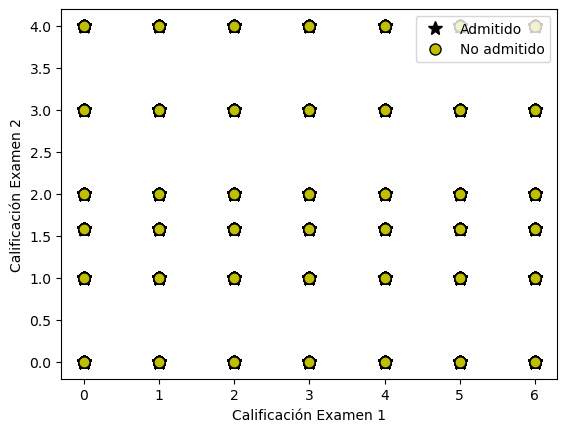

In [ ]:
plotData(X, y)
# adiciona etiquetas para los ejes
pyplot.xlabel('Calificación Examen 1')
pyplot.ylabel('Calificación Examen 2')
pyplot.legend(['Admitido', 'No admitido'])
pass